In [ ]:
!unzip /content/archive.zip -d /content/reviews

Archive:  /content/archive.zip
  inflating: /content/reviews/googleplaystore.csv  
  inflating: /content/reviews/googleplaystore_user_reviews.csv  
  inflating: /content/reviews/license.txt  


In [ ]:
import pandas as pd
df=pd.read_csv("/content/reviews/googleplaystore_user_reviews.csv")

In [ ]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df.duplicated().sum()

np.int64(33616)

In [ ]:
df.shape

(64295, 5)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df=df.drop_duplicates(subset=["App","Translated_Review"])

In [ ]:
df=df.dropna(subset=["Translated_Review"])

In [ ]:
df.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


In [ ]:
df.shape

(29692, 5)

In [ ]:
df.Translated_Review.value_counts()

,count
Translated_Review,
Good,137
Nice,105
Great,90
Love,81
I love,55
...,...
"You waste button theme change, yet STILL provide option system font customize colors? And disable weird history thing?",1
So good working office calculate keep record full history thats point like calculator,1
"BEST CALCULATOR! I wonder SM-T285, vibrate produce sound calculating. It helps calculate faster, every tap vibrates produce vip sound, please FIX. Or BETTER YET, speak number I need look I tap right number...lol",1


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (run only once)
nltk.download('stopwords')
nltk.download('wordnet')

# Init tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords and short words
    words = [
        lemmatizer.lemmatize(word)
        for word in text.split()
        if word not in stop_words and len(word) > 2
    ]
    return ' '.join(words)

# Apply to new column
df['cleaned_review'] = df['Translated_Review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
df[['cleaned_review','Translated_Review']]

,cleaned_review,Translated_Review
0,like eat delicious food thats cooking food cas...,I like eat delicious food. That's I'm cooking ...
1,help eating healthy exercise regular basis,This help eating healthy exercise regular basis
3,work great especially going grocery store,Works great especially going grocery store
4,best idea,Best idea us
5,best way,Best way
...,...,...
64222,ad older many agent much owner posted detail r...,Most ads older many agents ..not much owner po...
64223,photo posted portal load fit purpose sure stor...,"If photos posted portal load, fit purpose. I'm..."
64226,dumb app wanted post property rent give option...,"Dumb app, I wanted post property rent give opt..."
64227,property business got link sm happy performanc...,I property business got link SMS happy perform...


In [ ]:
df.to_csv("cleaned_reviews")

<Axes: title={'center': 'Top 10 Apps by Number of Reviews'}, ylabel='App'>

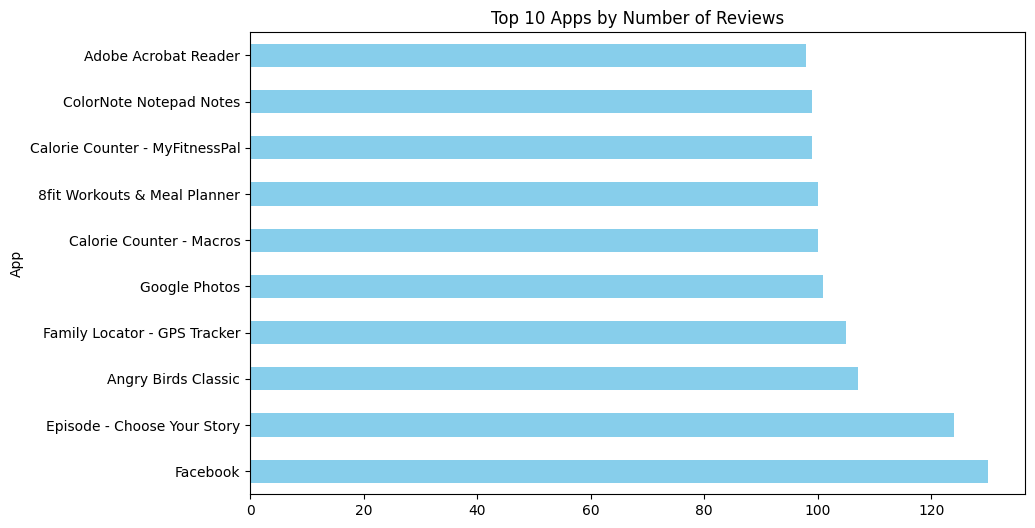

In [ ]:
top_apps = df['App'].value_counts().head(10)
top_apps.plot(kind='barh', figsize=(10,6), title='Top 10 Apps by Number of Reviews', color='skyblue')


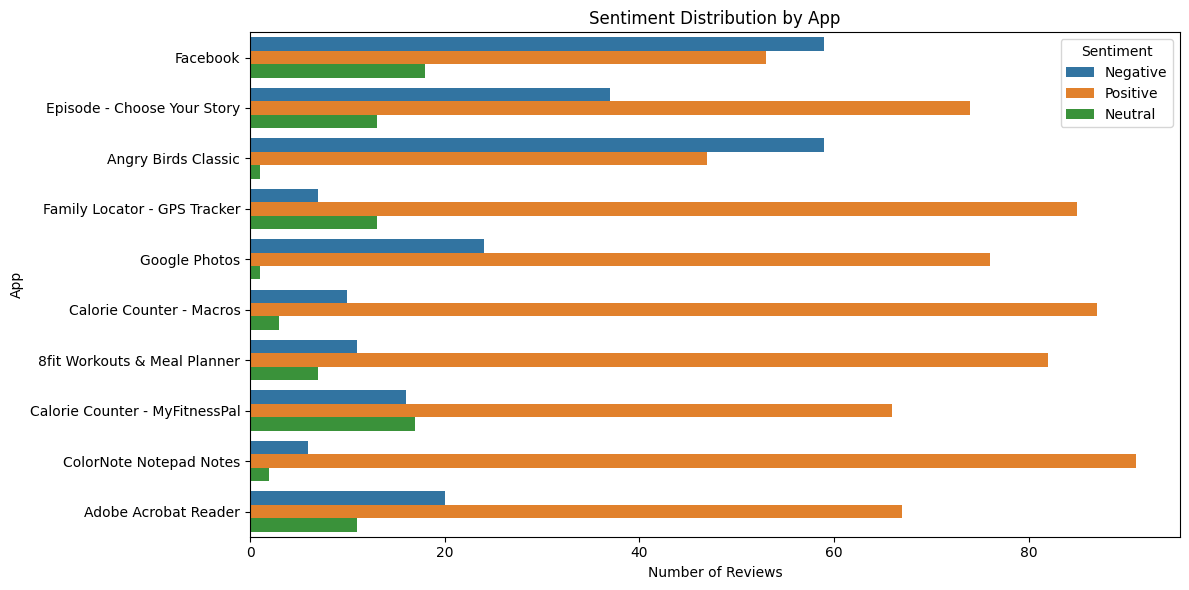

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
top_apps = df['App'].value_counts().head(10)
top_app_names = top_apps.index.tolist()
top_df = df[df['App'].isin(top_app_names)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_df, y='App', hue='Sentiment', order=top_app_names)
plt.title('Sentiment Distribution by App')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Apps with Most Negative Average Polarity'}, ylabel='App'>

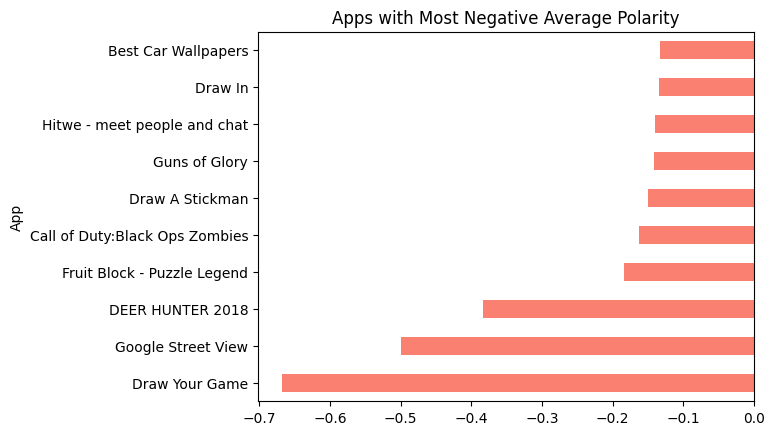

In [ ]:
df.groupby('App')['Sentiment_Polarity'].mean().sort_values().head(10).plot(
    kind='barh', title='Apps with Most Negative Average Polarity', color='salmon')

<Axes: title={'center': 'Apps with Most Positive Average Polarity'}, ylabel='App'>

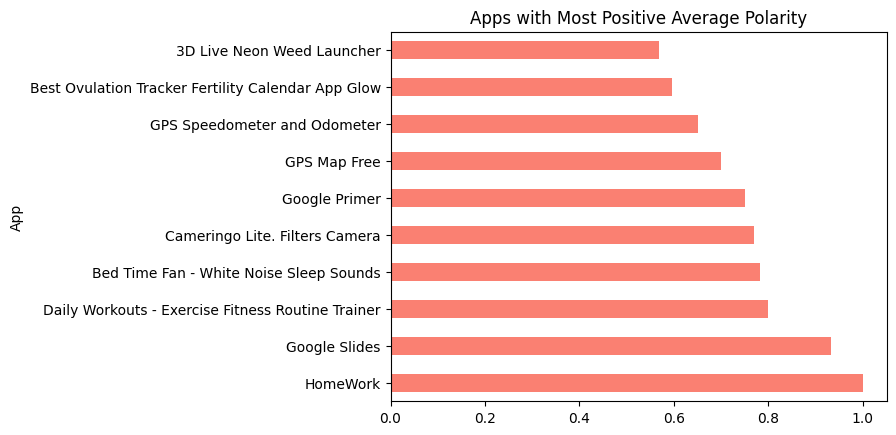

In [ ]:
df.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(10).plot(
    kind='barh', title='Apps with Most Positive Average Polarity', color='salmon')

In [ ]:
# Step 1: Total reviews per app
total_reviews = df.groupby('App').size().rename('Total')

# Step 2: Count of each sentiment per app
sentiment_counts = df.groupby(['App', 'Sentiment']).size().unstack()

# Step 3: Merge and calculate ratios
sentiment_ratios = sentiment_counts.join(total_reviews)
sentiment_ratios['Positive_Ratio'] = sentiment_ratios['Positive'] / sentiment_ratios['Total']
sentiment_ratios['Negative_Ratio'] = sentiment_ratios['Negative'] / sentiment_ratios['Total']
sentiment_ratios['Neutral_Ratio']  = sentiment_ratios['Neutral']  / sentiment_ratios['Total']



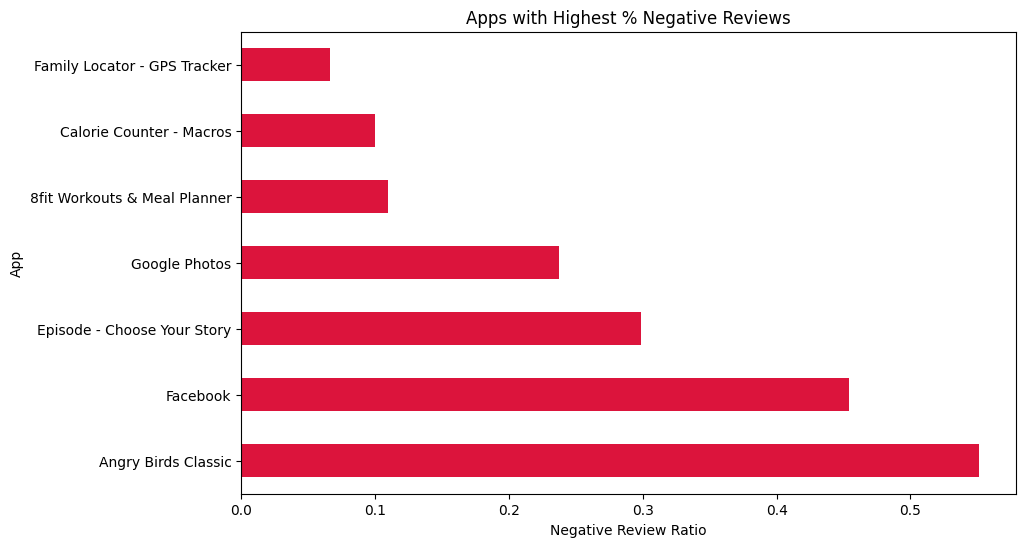

In [ ]:
top_neg_apps = sentiment_ratios[sentiment_ratios['Total'] >= 100].sort_values('Negative_Ratio', ascending=False).head(10)

top_neg_apps['Negative_Ratio'].plot(kind='barh', figsize=(10,6), color='crimson', title='Apps with Highest % Negative Reviews')
plt.xlabel("Negative Review Ratio")
plt.ylabel("App")
plt.show()


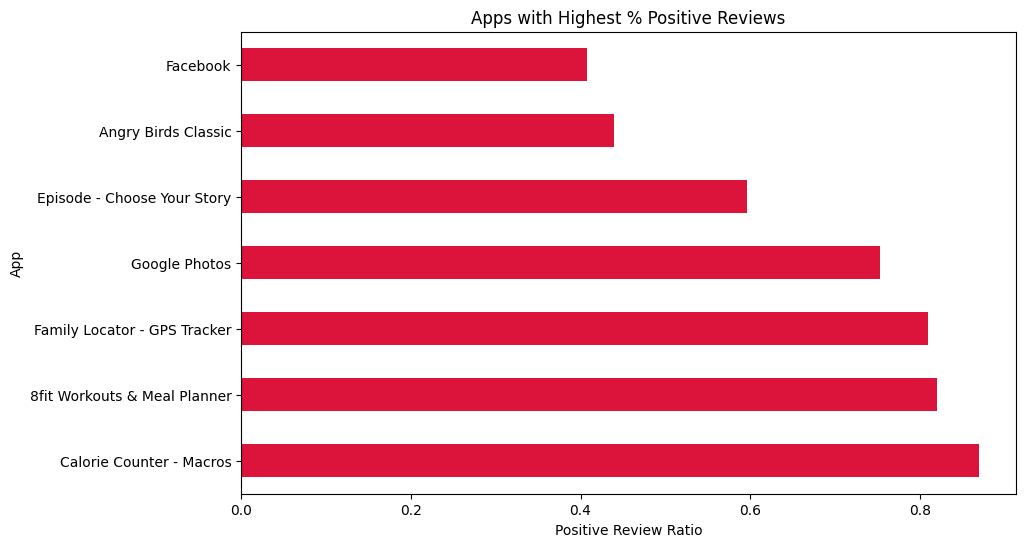

In [ ]:
top_neg_apps = sentiment_ratios[sentiment_ratios['Total'] >= 100].sort_values('Positive_Ratio', ascending=False).head(10)

top_neg_apps['Positive_Ratio'].plot(kind='barh', figsize=(10,6), color='crimson', title='Apps with Highest % Positive Reviews')
plt.xlabel("Positive Review Ratio")
plt.ylabel("App")
plt.show()

<Axes: xlabel='Sentiment_Polarity', ylabel='Count'>

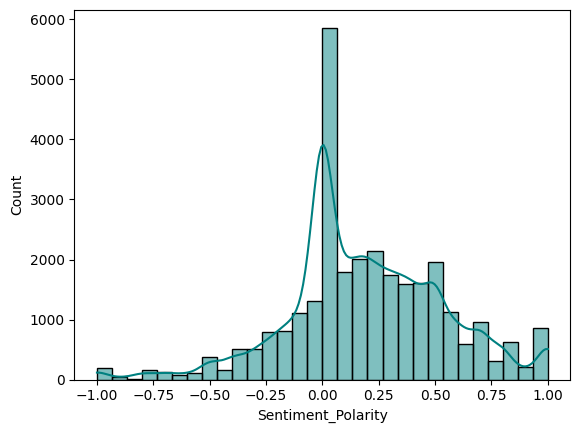

In [ ]:
import seaborn as sns
sns.histplot(df['Sentiment_Polarity'], kde=True, bins=30, color='teal')


<Axes: xlabel='Sentiment_Subjectivity', ylabel='Count'>

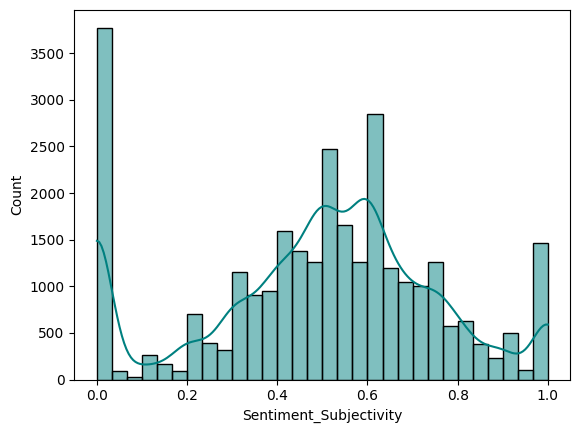

In [ ]:
import seaborn as sns
sns.histplot(df['Sentiment_Subjectivity'], kde=True, bins=30, color='teal')


In [ ]:
pip install wordcloud datasets

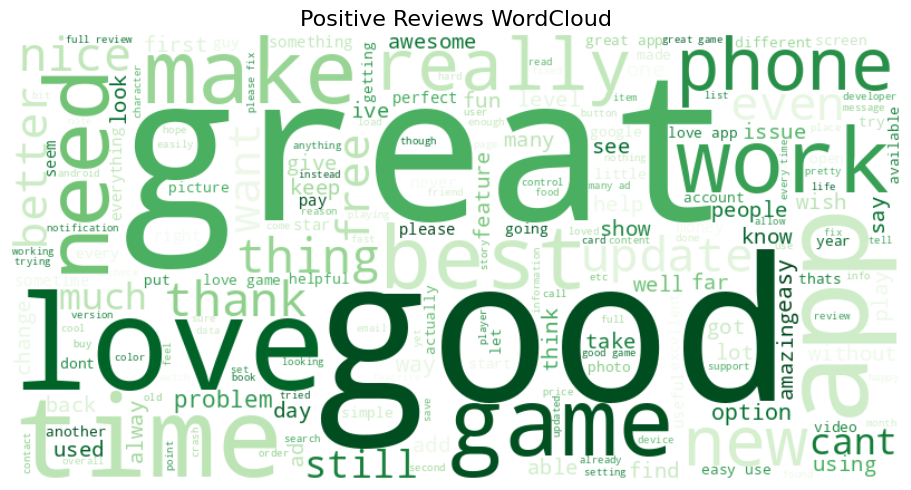

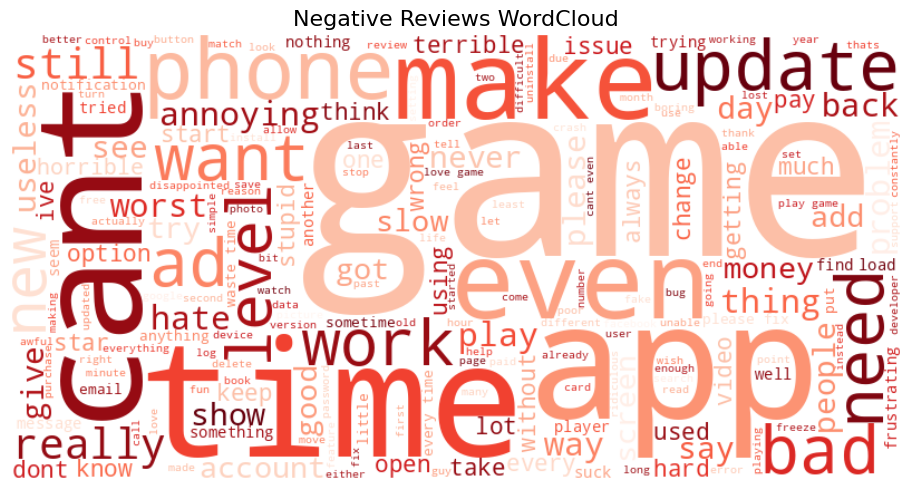

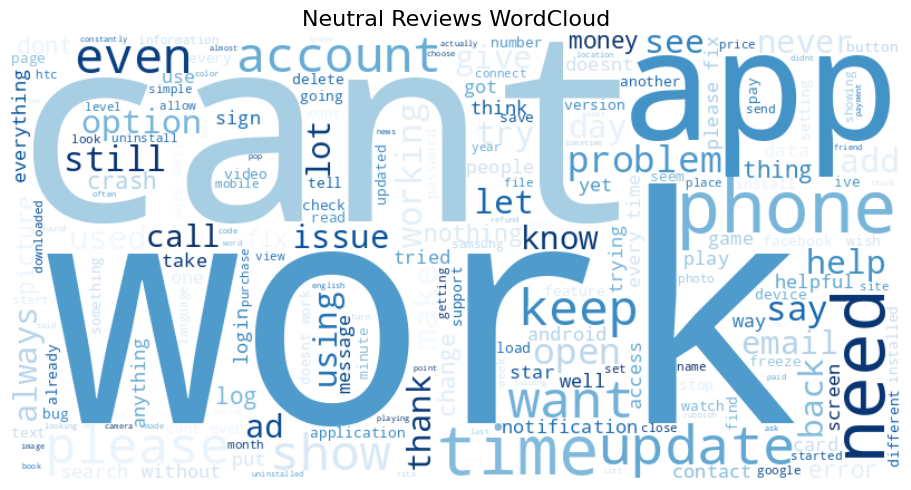

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Helper function
def show_wordcloud(text, title, color='black'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Generate text per sentiment
for sentiment, color in [('Positive', 'Greens'), ('Negative', 'Reds'), ('Neutral', 'Blues')]:
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_review'])
    show_wordcloud(text, f'{sentiment} Reviews WordCloud', color=color)


/tmp/ipython-input-30-806210087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='review_length', palette='Set2')


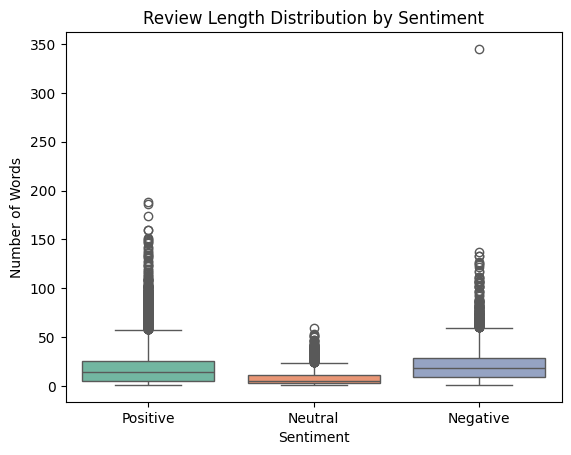

In [ ]:
df['review_length'] = df['Translated_Review'].str.split().apply(len)

sns.boxplot(data=df, x='Sentiment', y='review_length', palette='Set2')
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()


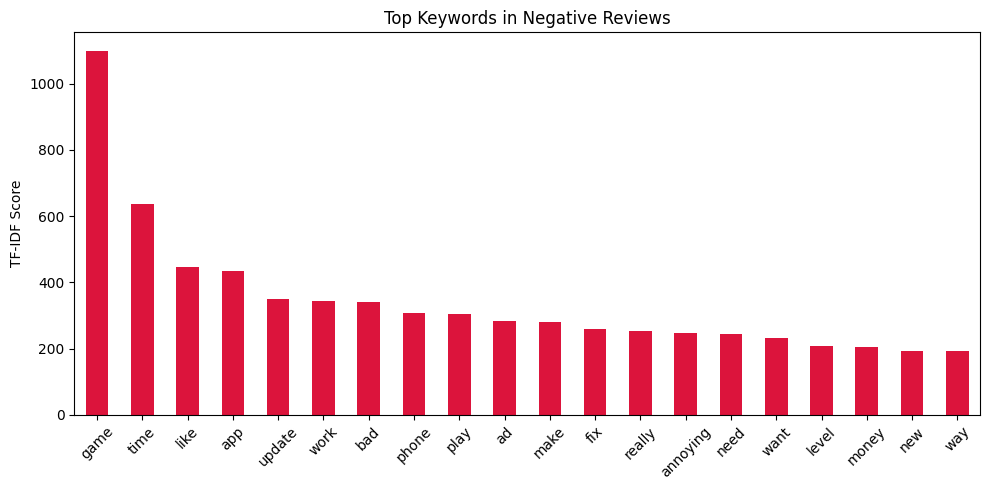

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Filter only negative reviews
neg_reviews = df[df['Sentiment'] == 'Negative']['cleaned_review']

# TF-IDF setup
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(neg_reviews)

# Show top keywords
top_keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
top_keywords.plot(kind='bar', color='crimson', title='Top Keywords in Negative Reviews', figsize=(10,5))
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


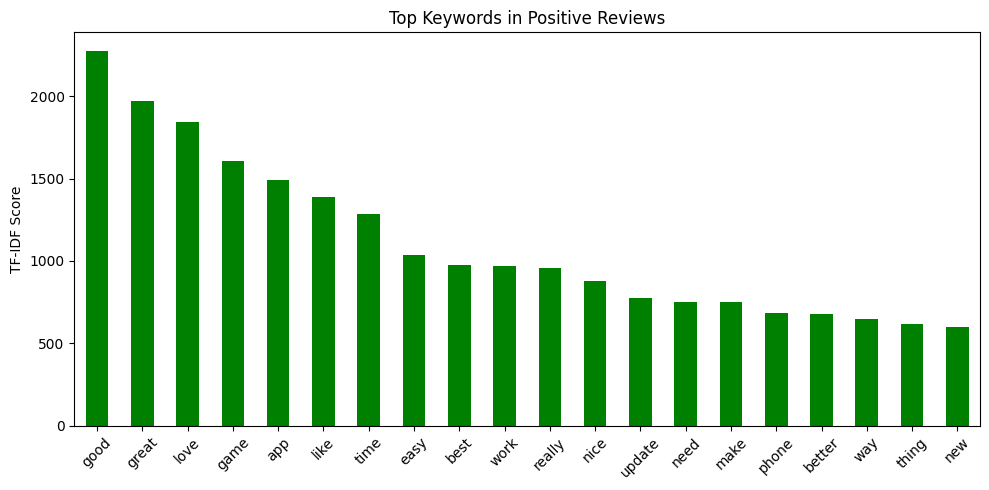

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Filter only negative reviews
neg_reviews = df[df['Sentiment'] == 'Positive']['cleaned_review']

# TF-IDF setup
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(neg_reviews)

# Show top keywords
top_keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
top_keywords.plot(kind='bar', color='green', title='Top Keywords in Positive Reviews', figsize=(10,5))
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def label_review(text):
    text = text.lower()

    bug_keywords = ['crash', 'freeze', 'bug', 'error', 'stuck', 'lag', 'slow', 'hang',
                    'not responding', 'issue', 'doesn\'t work', 'not working', 'failed', 'problem', 'unable','laggy']
    feature_keywords = ['add', 'include', 'feature', 'should have', 'would like',
                        'need option', 'allow', 'support', 'please', 'can you']
    praise_keywords = ['love', 'great', 'awesome', 'thanks', 'helpful', 'useful',
                       'best', 'excellent', 'amazing', 'fantastic', 'beautiful', 'nice','good','like','easy','best']

    if any(kw in text for kw in bug_keywords):
        return 'bug'
    elif any(kw in text for kw in feature_keywords):
        return 'feature'
    elif any(kw in text for kw in praise_keywords):
        return 'praise'
    else:
        return 'praise'

df['review_type'] = df['cleaned_review'].apply(label_review)



In [ ]:
from sklearn.utils import resample

df_bug = df[df['review_type'] == 'bug']
df_feature = df[df['review_type'] == 'feature']
df_praise = df[df['review_type'] == 'praise']

min_size = len(df_feature)

df_praise_downsampled = resample(
    df_praise,
    replace=False,
    n_samples=min_size,
    random_state=42
)

df_bug_downsampled = resample(
    df_bug,
    replace=False,
    n_samples=min_size,
    random_state=42
)

df_balanced = pd.concat([df_bug_downsampled, df_feature, df_praise_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle
X = df_balanced['cleaned_review']
y = df_balanced['review_type']




In [ ]:
# 1. Imports
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

# 2. Prepare Data
X = df_balanced['cleaned_review']
y = df_balanced['review_type']

# 3. Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# 5. Tokenization
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_data(texts, labels):
    return tokenizer(texts, truncation=True, padding='max_length', max_length=128), labels

train_encodings, train_labels = tokenize_data(X_train.tolist(), y_train.tolist())
test_encodings, test_labels = tokenize_data(X_test.tolist(), y_test.tolist())

# 6. Create Dataset
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

# 7. Load Model
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=3
)

# 8. Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss'
)

# 9. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

# 10. Train
trainer.train()

# 11. Evaluate
trainer.evaluate()

# 12. Predict
preds_output = trainer.predict(test_dataset)
y_pred = torch.tensor(preds_output.predictions).argmax(dim=1)

# 13. Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-35-4060843905.py:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mihira-ad22 (siddharthamdal-is23-bmsce) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.097000,0.084382
2,0.005600,0.084703
3,0.042200,0.071631
4,0.000700,0.084484


              precision    recall  f1-score   support

         bug       1.00      0.99      0.99       679
     feature       0.99      0.98      0.99       680
      praise       0.97      0.99      0.98       680

    accuracy                           0.99      2039
   macro avg       0.99      0.99      0.99      2039
weighted avg       0.99      0.99      0.99      2039



In [ ]:
import torch.nn.functional as F

def predict_with_confidence(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)
        conf, pred = torch.max(probs, dim=1)
        return label_encoder.inverse_transform([pred.item()])[0], conf.item()

# Apply to full dataframe
bert_labels = []
bert_confs = []

for review in df['cleaned_review']:
    label, conf = predict_with_confidence(review)
    bert_labels.append(label)
    bert_confs.append(conf)

df['bert_label'] = bert_labels
df['bert_confidence'] = bert_confs


In [ ]:
# Apply this logic across the DataFrame
def smart_override(row):
    # Only override if original label was 'praise' and BERT is confident
    if row['review_type'] == 'praise':
        if row['bert_confidence'] >= 0.90:
            return row['bert_label']
        else:
            return row['review_type']  # keep 'praise'
    else:
        return row['review_type']  # keep bug/feature as-is

# Create a new column with adjusted labels
df['final_label'] = df.apply(smart_override, axis=1)


In [ ]:
from sklearn.utils import resample

df_bug = df[df['final_label'] == 'bug']
df_feature = df[df['final_label'] == 'feature']
df_praise = df[df['final_label'] == 'praise']

min_size = len(df_feature)

df_praise_downsampled = resample(
    df_praise,
    replace=False,
    n_samples=min_size,
    random_state=42
)

df_bug_downsampled = resample(
    df_bug,
    replace=False,
    n_samples=min_size,
    random_state=42
)

df_balanced = pd.concat([df_bug_downsampled, df_feature, df_praise_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle
X = df_balanced['cleaned_review']
y = df_balanced['final_label']




In [ ]:
# 1. Imports
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

# 2. Prepare Data
X = df_balanced['cleaned_review']
y = df_balanced['final_label']

# 3. Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# 5. Tokenization
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_data(texts, labels):
    return tokenizer(texts, truncation=True, padding='max_length', max_length=128), labels

train_encodings, train_labels = tokenize_data(X_train.tolist(), y_train.tolist())
test_encodings, test_labels = tokenize_data(X_test.tolist(), y_test.tolist())

# 6. Create Dataset
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

# 7. Load Model
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=3
)

# 8. Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss'
)

# 9. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

# 10. Train
trainer.train()

# 11. Evaluate
trainer.evaluate()

# 12. Predict
preds_output = trainer.predict(test_dataset)
y_pred = torch.tensor(preds_output.predictions).argmax(dim=1)

# 13. Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-41-4028543660.py:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.048200,0.118576
2,0.036900,0.089553
3,0.098300,0.111140
4,0.013100,0.137836


              precision    recall  f1-score   support

         bug       1.00      0.98      0.99       696
     feature       1.00      0.97      0.98       696
      praise       0.96      1.00      0.98       696

    accuracy                           0.98      2088
   macro avg       0.98      0.98      0.98      2088
weighted avg       0.98      0.98      0.98      2088



In [ ]:
model.save_pretrained("reviewlens-bert-model")
tokenizer.save_pretrained("reviewlens-bert-model")


('reviewlens-bert-model/tokenizer_config.json',
 'reviewlens-bert-model/special_tokens_map.json',
 'reviewlens-bert-model/vocab.txt',
 'reviewlens-bert-model/added_tokens.json',
 'reviewlens-bert-model/tokenizer.json')

In [ ]:
!zip reviewlens-bert-model.zip -r reviewlens-bert-model

  adding: reviewlens-bert-model/ (stored 0%)
  adding: reviewlens-bert-model/special_tokens_map.json (deflated 42%)
  adding: reviewlens-bert-model/vocab.txt (deflated 53%)
  adding: reviewlens-bert-model/tokenizer.json (deflated 71%)
  adding: reviewlens-bert-model/model.safetensors (deflated 8%)
  adding: reviewlens-bert-model/tokenizer_config.json (deflated 75%)
  adding: reviewlens-bert-model/config.json (deflated 48%)


In [ ]:
df.to_csv("final_reviewlens_dataset.csv", index=False)


In [ ]:
pip install keybert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT('all-MiniLM-L6-v2')  # small but fast
def extract_keyphrases(text):
    try:
        keywords = kw_model.extract_keywords(
            text,
            keyphrase_ngram_range=(1, 2),
            stop_words='english',
            top_n=2,
            use_maxsum=True,
            nr_candidates=20
        )
        return [kw[0] for kw in keywords]
    except:
        return []



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
df=pd.read_csv("final_reviewlens_dataset.csv")


In [ ]:
df['keyphrases'] = df['cleaned_review'].apply(extract_keyphrases)


In [ ]:
def compute_urgency(row):
    # Strong negative = high urgency
    polarity_score = 1 - ((row['Sentiment_Polarity'] + 1) / 2)  # Normalize polarity to 0–1, invert

    # More subjective = more emotional
    subjectivity_score = row['Sentiment_Subjectivity']  # Already 0–1

    # Combine them (weighted)
    urgency = 0.7 * polarity_score + 0.3 * subjectivity_score
    return round(urgency, 3)


In [ ]:
df['urgency'] = df.apply(compute_urgency, axis=1)


In [ ]:
df.groupby('final_label')['urgency'].mean()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Sentiment_Polarity', y='urgency', hue='final_label')
plt.title('Urgency vs Sentiment Polarity')
plt.show()


In [ ]:
# Explode the keyphrases column so each phrase gets its own row
df_exploded = df[['keyphrases', 'urgency', 'final_label']].explode('keyphrases')


In [ ]:
agg = df_exploded.groupby(['keyphrases', 'final_label']).agg(
    freq=('keyphrases', 'count'),
    avg_urgency=('urgency', 'mean')
).reset_index()


In [ ]:
import plotly.express as px

fig = px.scatter(
    agg,
    x="freq",
    y="avg_urgency",
    size="freq",
    color="final_label",
    hover_name="keyphrases",
    title="Urgent & Frequent Keyphrases by final label",
    size_max=40,
    height=600
)
fig.show()


In [ ]:
!unzip /content/reviewlens-bert-model.zip -d /content/reviewlens-bert-model

Archive:  /content/reviewlens-bert-model.zip
   creating: /content/reviewlens-bert-model/reviewlens-bert-model/
  inflating: /content/reviewlens-bert-model/reviewlens-bert-model/special_tokens_map.json  
  inflating: /content/reviewlens-bert-model/reviewlens-bert-model/vocab.txt  
  inflating: /content/reviewlens-bert-model/reviewlens-bert-model/tokenizer.json  
  inflating: /content/reviewlens-bert-model/reviewlens-bert-model/model.safetensors  
  inflating: /content/reviewlens-bert-model/reviewlens-bert-model/tokenizer_config.json  
  inflating: /content/reviewlens-bert-model/reviewlens-bert-model/config.json  


In [ ]:
import os

In [ ]:
from huggingface_hub import HfApi
from google.colab import userdata

# Get your Hugging Face token from Colab secrets
HF_TOKEN = userdata.get("HF_TOKEN")

# Instantiate HfApi with your token
api = HfApi(token=HF_TOKEN)

# Upload the folder
api.upload_folder(
    folder_path="/content/reviewlens-bert-model",
    repo_id="smihira/reviewlens",
    repo_type="model",
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/smihira/reviewlens/commit/7349ad6cd18d2c88ff7254cb2a56209efde45cec', commit_message='Upload folder using huggingface_hub', commit_description='', oid='7349ad6cd18d2c88ff7254cb2a56209efde45cec', pr_url=None, repo_url=RepoUrl('https://huggingface.co/smihira/reviewlens', endpoint='https://huggingface.co', repo_type='model', repo_id='smihira/reviewlens'), pr_revision=None, pr_num=None)